In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# file = open('C:/Users/Atharva/Desktop/pro/acc')
# lines = file.readlines()

# processedList = []

# for i, line in enumerate(lines):
#     try:
#         line = line.split(',')
#         last = line[5].split(';')[0]
#         last = last.strip()
#         if last == '':
#             break;
#         temp = [line[0], line[1], line[2], line[3], line[4], last]
#         processedList.append(temp)
#     except:
#         print('Error at line number: ', i)
# processedList
# columns = ['user', 'activity', 'time', 'x', 'y', 'z']

2.15.0


In [6]:

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/data.csv')

processedList = []

for i, row in df.iterrows():
    try:
        last = str(row[5]).strip()
        if last == '':
            break
        temp = [row[0],row[1],row[2],row[3],row[4],last]
        processedList.append(temp)
    except Exception as e:
        print(f'Error at line number {i}: {e}')

In [7]:
processedList

[[0.01338525,
  'Sitting',
  -0.552742004,
  5.215754986,
  8.176275253,
  '9.713964217'],
 [0.015706417,
  'Sitting',
  -0.509671211,
  5.234897614,
  8.147561073,
  '9.697766197'],
 [0.018027583,
  'Sitting',
  -0.491126835,
  5.21994257,
  8.171489716,
  '9.708874815'],
 [0.020351863,
  'Sitting',
  -0.452841699,
  5.233701229,
  8.185846329,
  '9.726498562'],
 [0.022676264,
  'Sitting',
  -0.452841699,
  5.219344616,
  8.20498848,
  '9.734909336'],
 [0.02500262, 'Sitting', -0.462412983, 5.214558601, 8.214560509, '9.74086503'],
 [0.027337214,
  'Sitting',
  -0.491126835,
  5.196014404,
  8.219346046,
  '9.736396699'],
 [0.029660274,
  'Sitting',
  -0.519840717,
  5.186442852,
  8.224131584,
  '9.736825157'],
 [0.031984493,
  'Sitting',
  -0.572482824,
  5.153541565,
  8.233104706,
  '9.72988902'],
 [0.034306758,
  'Sitting',
  -0.625124931,
  5.125426292,
  8.237890244,
  '9.722325417'],
 [0.036627864,
  'Sitting',
  -0.677168787,
  5.130809784,
  8.242077827,
  '9.732194692'],
 [0.

In [8]:
columns = ['Time', 'Activity', 'acc_x', 'acc_y', 'acc_z', 'acc_a']

In [9]:
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,Time,Activity,acc_x,acc_y,acc_z,acc_a
0,0.013385,Sitting,-0.552742,5.215755,8.176275,9.713964217
1,0.015706,Sitting,-0.509671,5.234898,8.147561,9.697766197
2,0.018028,Sitting,-0.491127,5.219943,8.171490,9.708874815
3,0.020352,Sitting,-0.452842,5.233701,8.185846,9.726498562
4,0.022676,Sitting,-0.452842,5.219345,8.204988,9.734909336


In [10]:
data.shape

(89747, 6)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89747 entries, 0 to 89746
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      89747 non-null  float64
 1   Activity  89747 non-null  object 
 2   acc_x     89747 non-null  float64
 3   acc_y     89747 non-null  float64
 4   acc_z     89747 non-null  float64
 5   acc_a     89747 non-null  object 
dtypes: float64(4), object(2)
memory usage: 4.1+ MB


In [12]:
data['Activity'].value_counts()


Running    31541
Walking    30104
Sitting    28102
Name: Activity, dtype: int64

In [14]:
data['acc_x'] = data['acc_x'].astype('float')
data['acc_y'] = data['acc_y'].astype('float')
data['acc_z'] = data['acc_z'].astype('float')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89747 entries, 0 to 89746
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      89747 non-null  float64
 1   Activity  89747 non-null  object 
 2   acc_x     89747 non-null  float64
 3   acc_y     89747 non-null  float64
 4   acc_z     89747 non-null  float64
 5   acc_a     89747 non-null  object 
dtypes: float64(4), object(2)
memory usage: 4.1+ MB


In [23]:
Fs = 50


In [18]:
Activities = data['Activity'].value_counts().index

In [19]:
Activities

Index(['Running', 'Walking', 'Sitting'], dtype='object')

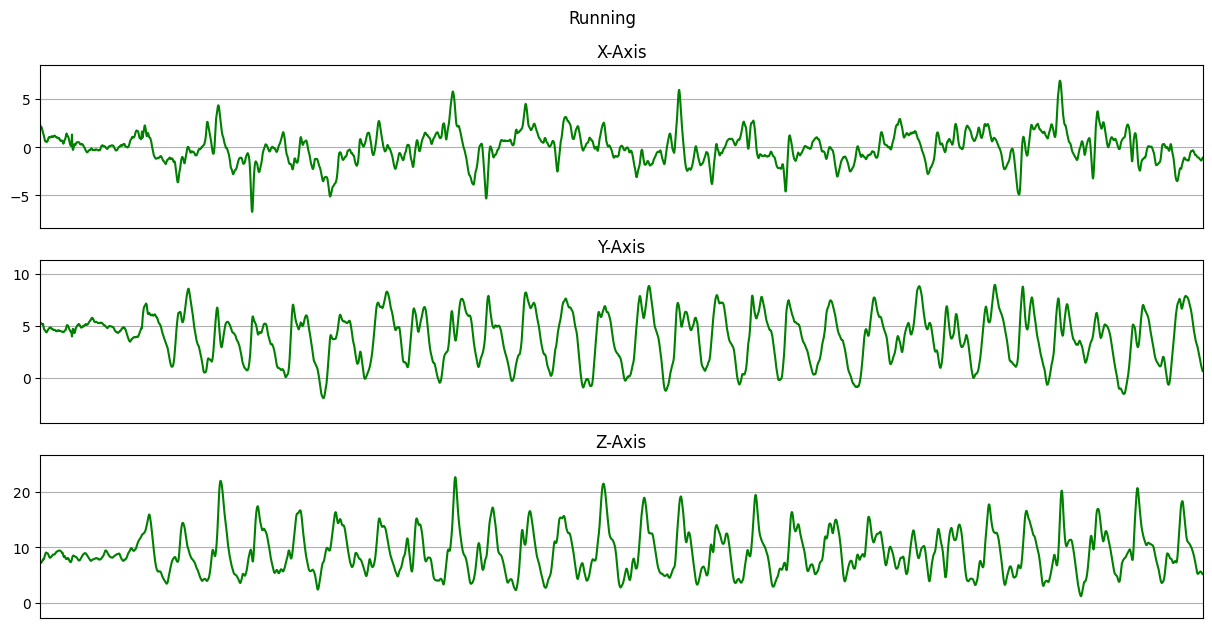

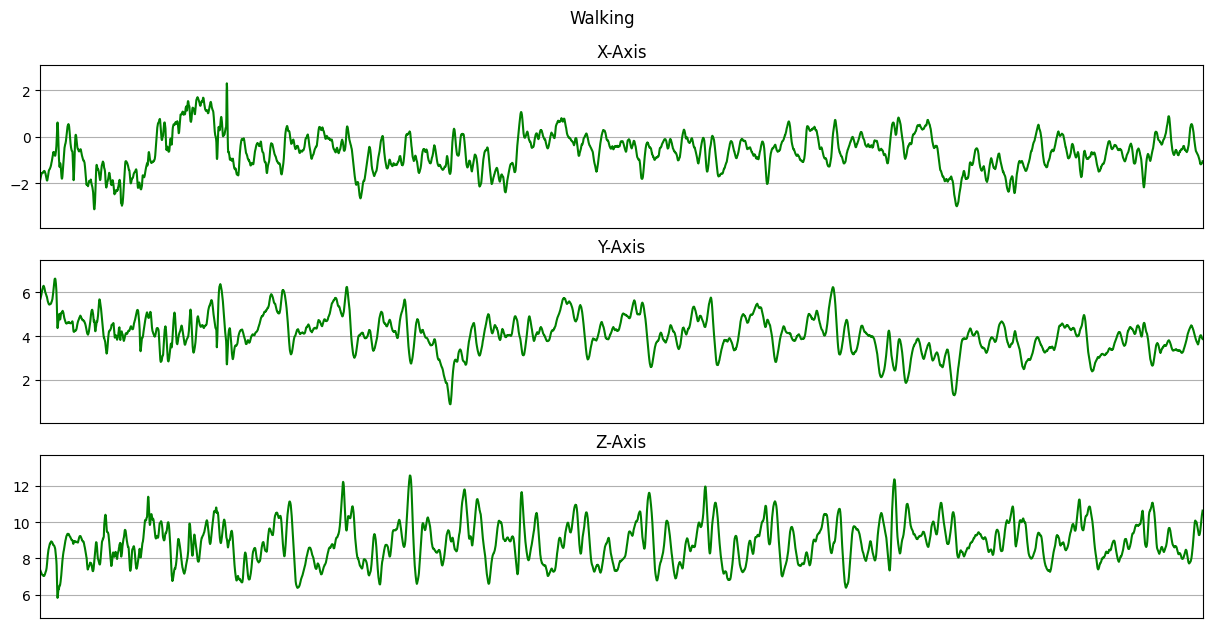

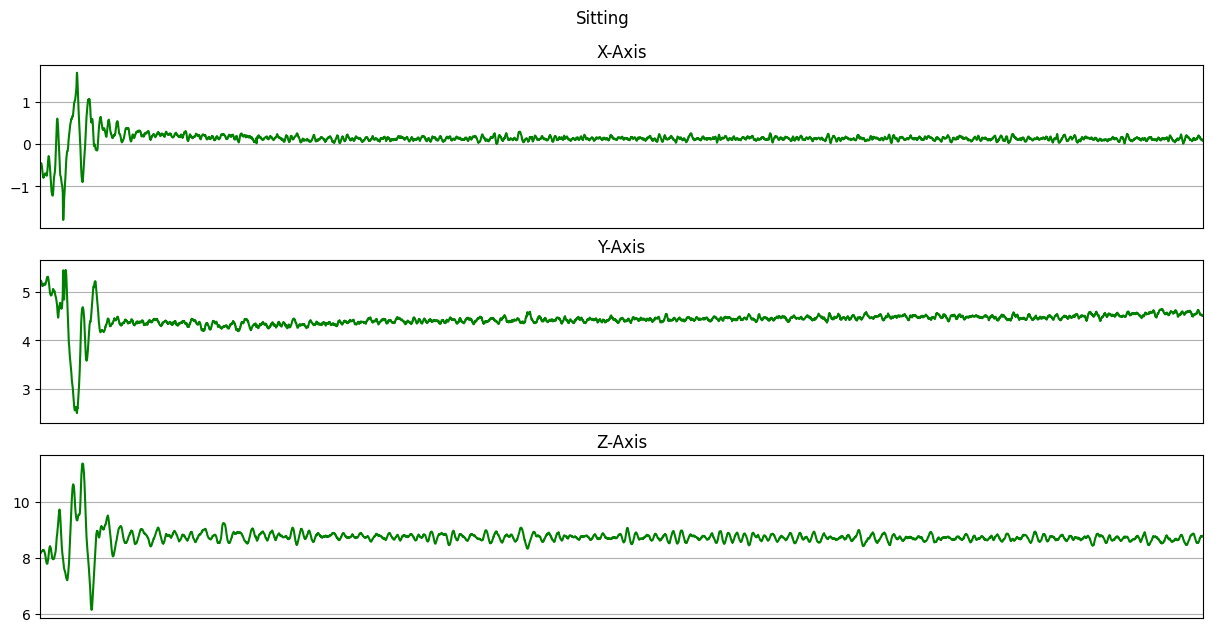

In [25]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['Time'], data['acc_x'], 'X-Axis')
    plot_axis(ax1, data['Time'], data['acc_y'], 'Y-Axis')
    plot_axis(ax2, data['Time'], data['acc_z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in Activities:
    data_for_plot = data[(data['Activity'] == activity)][:Fs*100]
    plot_activity(activity, data_for_plot)

In [26]:
df = data.drop(['Time', 'acc_a'], axis = 1).copy()
df.head()

,Activity,acc_x,acc_y,acc_z
0,Sitting,-0.552742,5.215755,8.176275
1,Sitting,-0.509671,5.234898,8.147561
2,Sitting,-0.491127,5.219943,8.171490
3,Sitting,-0.452842,5.233701,8.185846
4,Sitting,-0.452842,5.219345,8.204988


In [28]:
df['Activity'].value_counts()

Running    31541
Walking    30104
Sitting    28102
Name: Activity, dtype: int64

In [29]:
Walking = df[df['Activity']=='Walking'].head(28102).copy()
Sitting = df[df['Activity']=='Sitting'].head(28102).copy()
Running = df[df['Activity']=='Running'].head(28102).copy()


In [30]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Sitting,Running])
balanced_data.shape

<ipython-input-30-73ae82ab1437>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append([Walking, Sitting,Running])


(84306, 4)

In [31]:
balanced_data['Activity'].value_counts()

Walking    28102
Sitting    28102
Running    28102
Name: Activity, dtype: int64

In [35]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['Activity'])
balanced_data.head(-5)

,Activity,acc_x,acc_y,acc_z,label
28102,Walking,-1.873580,5.688338,7.378269,2
28103,Walking,-1.820938,5.687739,7.354341,2
28104,Walking,-1.768296,5.734998,7.316653,2
28105,Walking,-1.696511,5.787042,7.288538,2
28106,Walking,-1.648655,5.810371,7.241280,2
...,...,...,...,...,...
86298,Running,-2.100898,2.223531,5.871388,0
86299,Running,-2.134996,2.203192,6.157331,0
86300,Running,-2.135594,2.167299,6.523433,0
86301,Running,-2.066202,2.115853,6.971489,0


In [36]:
label.classes_

array(['Running', 'Sitting', 'Walking'], dtype=object)

In [37]:
X = balanced_data[['acc_x', 'acc_y', 'acc_z']]
y = balanced_data['label']

In [38]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['acc_x', 'acc_y', 'acc_z'])
scaled_X['label'] = y.values

scaled_X

,acc_x,acc_y,acc_z,label
0,-1.743326,1.276136,-0.762794,2
1,-1.690658,1.275725,-0.773937,2
2,-1.637989,1.308163,-0.791489,2
3,-1.566168,1.343886,-0.804582,2
4,-1.518288,1.359899,-0.826591,2
...,...,...,...,...
84301,-1.633800,-1.202285,-0.479188,0
84302,-1.502128,-1.228564,-0.241550,0
84303,-1.418338,-1.254432,-0.001962,0
84304,-1.414746,-1.276194,0.219796,0


In [39]:
import scipy.stats as stats

In [40]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [42]:
import numpy as np

def get_frames(df, frame_size, hop_size):
    frames = []
    labels = []

    for i in range(0, len(df) - frame_size, hop_size):
        acc_x = df['acc_x'].values[i: i + frame_size]
        acc_y = df['acc_y'].values[i: i + frame_size]
        acc_z = df['acc_z'].values[i: i + frame_size]

        # Retrieve the most often used label in this segment
        sliced_label = df['label'].values[i: i + frame_size]
        mode_result = stats.mode(sliced_label)
        label = mode_result.mode
        frames.append([acc_x, acc_y, acc_z])
        labels.append(label)

    # Convert frames and labels to NumPy arrays
    X = np.array(frames)
    y = np.array(labels)

    return X, y

# Assuming scaled_X, frame_size, and hop_size are defined elsewhere
X, y = get_frames(scaled_X, frame_size, hop_size)


In [43]:
X.shape, y.shape

((2106, 3, 80), (2106,))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [45]:
X_train.shape, X_test.shape

((1684, 3, 80), (422, 3, 80))

In [46]:
X_train[0].shape, X_test[0].shape

((3, 80), (3, 80))

In [47]:
X_train = X_train.reshape(1684, 80, 3, 1)
X_test = X_test.reshape(422, 80, 3, 1)

In [48]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [49]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [50]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)


Epoch 1/10
53/53 [==============================] - 2s 15ms/step - loss: 0.7590 - accuracy: 0.6930 - val_loss: 0.3198 - val_accuracy: 0.9100
Epoch 2/10
53/53 [==============================] - 1s 14ms/step - loss: 0.2892 - accuracy: 0.9014 - val_loss: 0.1105 - val_accuracy: 0.9692
Epoch 3/10
53/53 [==============================] - 1s 16ms/step - loss: 0.1675 - accuracy: 0.9531 - val_loss: 0.0861 - val_accuracy: 0.9692
Epoch 4/10
53/53 [==============================] - 1s 16ms/step - loss: 0.1357 - accuracy: 0.9620 - val_loss: 0.0867 - val_accuracy: 0.9739
Epoch 5/10
53/53 [==============================] - 1s 17ms/step - loss: 0.1211 - accuracy: 0.9721 - val_loss: 0.0844 - val_accuracy: 0.9668
Epoch 6/10
53/53 [==============================] - 1s 11ms/step - loss: 0.1084 - accuracy: 0.9703 - val_loss: 0.0882 - val_accuracy: 0.9668
Epoch 7/10
53/53 [==============================] - 1s 10ms/step - loss: 0.1039 - accuracy: 0.9715 - val_loss: 0.0854 - val_accuracy: 0.9716
Epoch 8/10
53

In [51]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

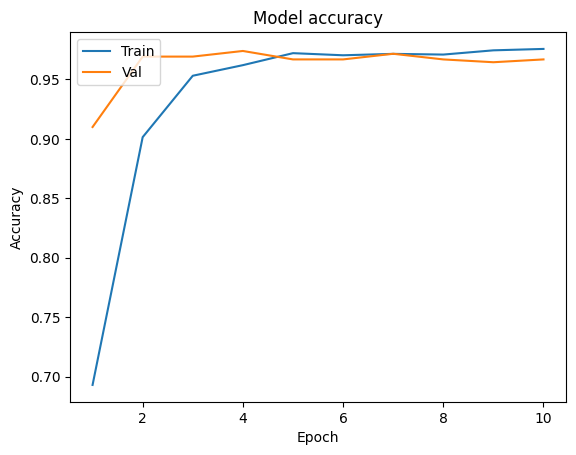

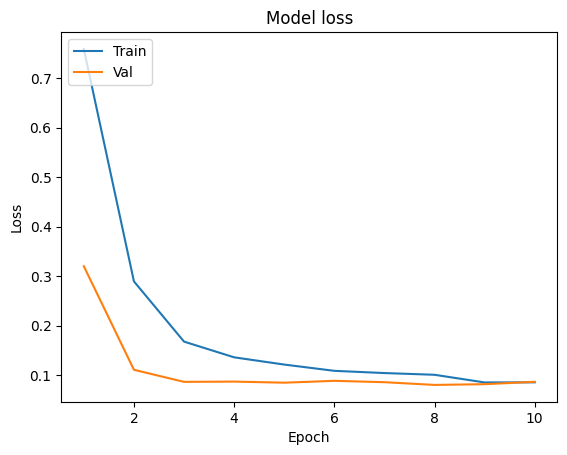

In [52]:
plot_learningCurve(history, 10)


In [1]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'mlxtend'

In [53]:
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)


14/14 [==============================] - 0s 3ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

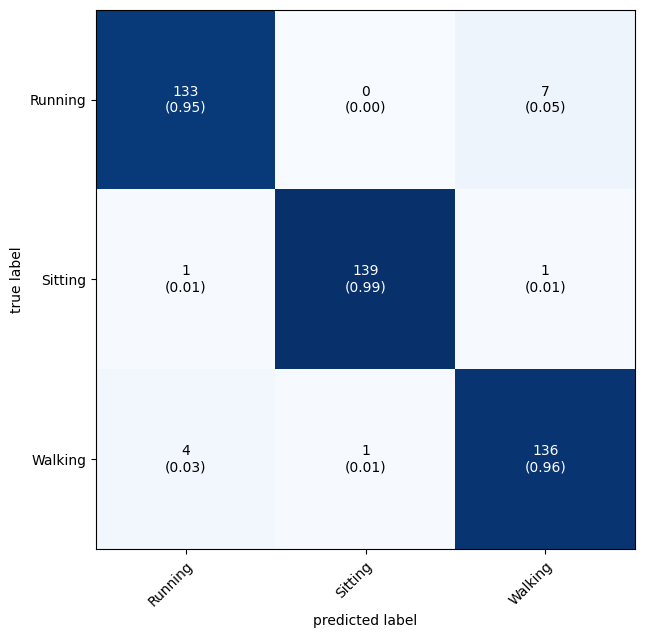

In [56]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))